## Regression Classification on Health Insurance dataset

##### Over the past decade we have seen how the health industry has been growing.In this dataset visualization we are creating a sctatter plot to see the how independent variabes like age,sex,bmi,smoker,region are attributes towards target y.

In [38]:
#Importing the packages 
#Using NumPy, Pandas, SciPy, Scikit-Learn, etc. to perform the analysis.
#Using Matplotlib, Seaborn, etc. to create graphs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
#Reading the  dataset
Insurance_df = pd.read_csv("insurance.csv")

In [41]:
Insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
#Checking for null values 
Insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [43]:
#Checking for datatypes and count 
Insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<AxesSubplot:ylabel='Frequency'>

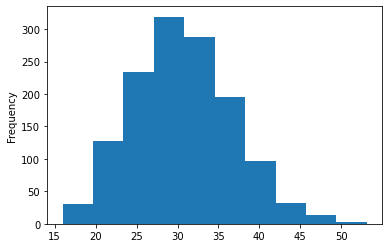

In [60]:
Insurance_df["bmi"].plot(kind = 'hist')

<AxesSubplot:xlabel='age', ylabel='sex'>

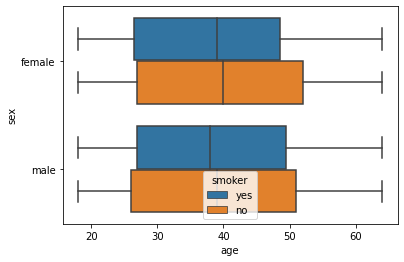

In [10]:
#boxplot representing the sex and age group of male and female smokers
sns.boxplot(x='age',y='sex',hue='smoker',data=df)

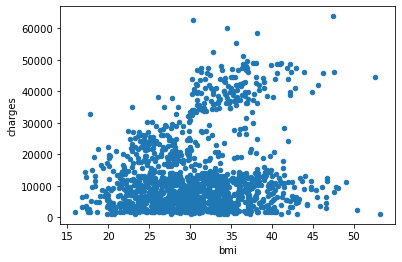

In [68]:
Insurance_df.plot(kind = 'scatter', x = 'bmi', y = 'charges')

plt.show()

In [45]:
#Descriptive stats 
Insurance_df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


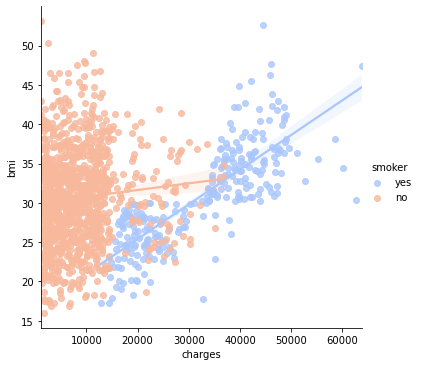

In [11]:
#Scatter plt representing charges by insurance company to people with varying bmi. 
sns.lmplot(x='charges', y='bmi',hue='smoker',data=df,palette='coolwarm')

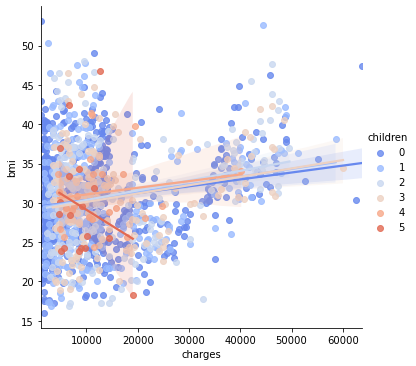

In [71]:
sns.lmplot(x='charges', y='bmi',hue='children',data=df,palette='coolwarm')

In [13]:
Insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
#As Region doesn't play role in Insurances redemtion so we will drop it.
Insurance_df = Insurance_df.drop(labels=['region'],axis=1)

In [15]:
Insurance_df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [16]:
#Using Label Encoder on labels=sex,smoker,children
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
Insurance_df['sex'] = label_encoder.fit_transform(Insurance_df['sex'])
Insurance_df['smoker'] = label_encoder.fit_transform(Insurance_df['smoker'])
Insurance_df['children'] = label_encoder.fit_transform(Insurance_df['children'])

In [17]:
#Defining X and Y to features set and Target value for train and test data
X = Insurance_df[['age','sex','bmi','children','smoker']]
y = Insurance_df['charges']

### Correlation

<AxesSubplot:>

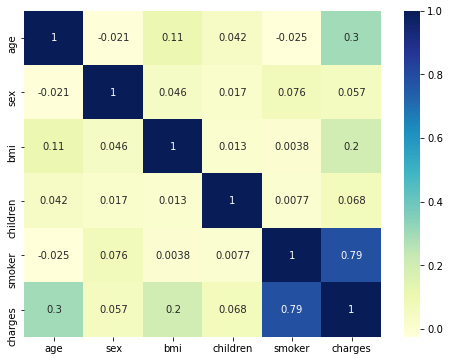

In [81]:
Insurance_correl = Insurance_df.corr()
plt.figure(figsize=(8,6))
cmap="tab10"
sns.heatmap(corr, annot=True, cmap = 'YlGnBu')


### Regression 

In [18]:
#Splitting the data into training and testing purpose X: Train set, Y:Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=101)

In [33]:
#Creating training Model
from sklearn.linear_model import LinearRegression
Insurance_lr = LinearRegression()
Insurance_lr.fit(X_train,y_train)
print("Perfomring Linear Regression")

Perfomring Linear Regression


In [84]:
#Predicting 
predictions = Insurance_lr.predict(X_test)
Insurance_lr.predict(X_test)

array([ 1.05070714e+04,  2.75743893e+03,  1.00388289e+04,  2.76601559e+04,
        5.99633677e+03,  2.19218789e+02,  1.47710809e+04,  4.75461048e+03,
        1.07618776e+04,  7.58331695e+03,  7.78860452e+03,  1.11440879e+04,
        7.07789324e+03,  1.21137729e+04,  3.12305750e+04,  3.72625275e+04,
        1.01030312e+04,  3.72038181e+03,  1.54390188e+04,  1.41116578e+04,
        2.95613991e+04,  7.85946142e+03,  1.31633816e+04,  5.59772397e+03,
        2.53823115e+02,  2.57623818e+04,  1.14953619e+04,  2.79756493e+04,
        3.84007685e+04,  5.12395216e+03,  5.77385694e+03,  7.77491823e+03,
        3.22215770e+03,  2.36867364e+03,  6.46809159e+03,  5.69659847e+03,
        1.00313361e+03,  1.30680673e+04,  1.41011079e+04,  1.03988315e+04,
        1.07196954e+04,  1.00460544e+04,  1.53328105e+04,  9.83519823e+03,
        5.91859615e+03,  6.89139291e+03,  7.88298425e+03,  2.82364964e+03,
        1.22152593e+04,  1.99256082e+03, -6.80467795e+02,  3.22257007e+03,
        7.02903726e+03,  

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


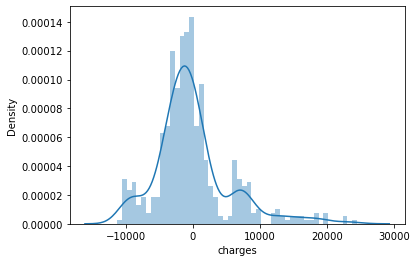

In [21]:
#Graph representing the predicted charges for the health insuarnce 
sns.distplot((y_test-predictions),bins=50);

### Testing the model 

In [36]:
#Calculating coefficient of determination and correlation coefficient
and import math
from sklearn import metrics
predicted = Insurance_lr.predict(X_test)
expected  = y_test
r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)
print(f'coefficient of determination = {r2:.1f}')
print(f'     correlation coefficient = {r:.1f}')

coefficient of determination = 0.8
     correlation coefficient = 0.9


In [22]:
#calculating r squared
SS_Residual = sum((y_test-predictions)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
print('R Squared:', r_squared)

R Squared: 0.7661770377474628


#### This shows a strong linear correlation

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


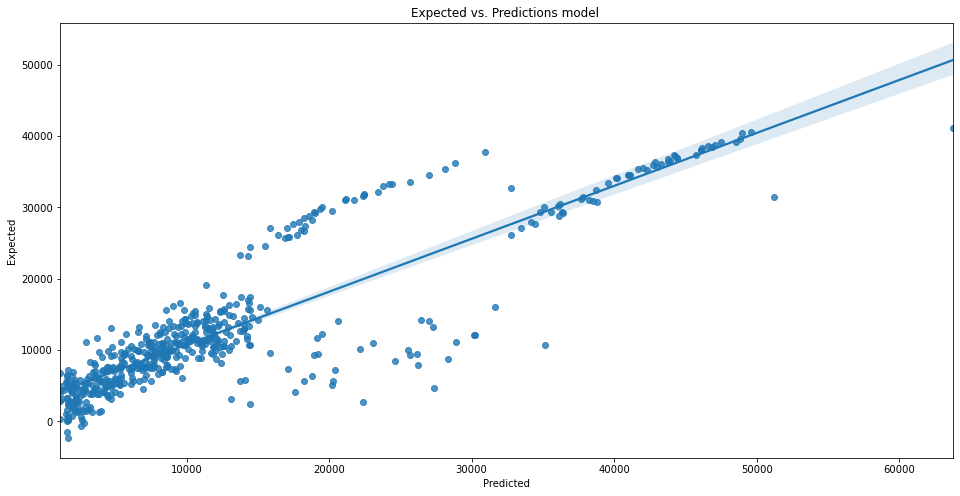

In [29]:
#Visualizing the expected vs. predicted values 

plt.figure(figsize=(16,8))
sns.regplot(y_test,predictions)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.title("Expected vs. Predictions model ")
plt.grid(False)
plt.show()

In [ ]:
#This graph summurizes the expected vs.the predicted values given by the model for the insurance dataset. 
#The graph shows that the charges is linearly dependenet on charges 
